# 📝 Exercise M4.02

The goal of this exercise is to build an intuition on what will be the
parameters' values of a linear model when the link between the data and the
target is non-linear.

First, we will generate such non-linear data.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"><tt class="docutils literal">np.random.RandomState</tt> allows to create a random number generator which can
be later used to get deterministic results.</p>
</div>

In [1]:
import numpy as np
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

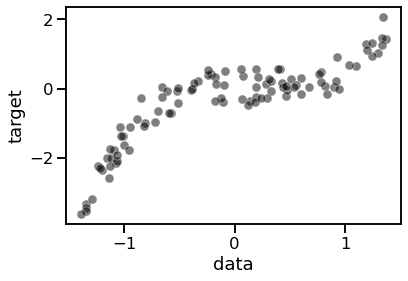

In [2]:
import pandas as pd
import seaborn as sns

full_data = pd.DataFrame({"data": data, "target": target})
_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

We observe that the link between the data `data` and vector `target` is
non-linear. For instance, `data` could represent to be the years of
experience (normalized) and `target` the salary (normalized). Therefore, the
problem here would be to infer the salary given the years of experience.

Using the function `f` defined below, find both the `weight` and the
`intercept` that you think will lead to a good linear model. Plot both the
data and the predictions of this model. Compute the mean squared error as
well.

In [3]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data + intercept
    return target_predict

In [51]:
# Write your code here.: plot both the data and the model predictions

weight = [0.5, 0.75, 1, 2]
intercept = [-1, -0.75, -0.5, 0]

preds = np.array([f(full_data['data'], weight=w, intercept= i) \
                  for w in weight for i in intercept])
preds.shape

(16, 100)

In [52]:
preds

array([[-0.93166109, -0.69873489, -0.85613127, ..., -1.67184944,
        -0.53948396, -1.69342633],
       [-0.68166109, -0.44873489, -0.60613127, ..., -1.42184944,
        -0.28948396, -1.44342633],
       [-0.43166109, -0.19873489, -0.35613127, ..., -1.17184944,
        -0.03948396, -1.19342633],
       ...,
       [-0.47664438,  0.45506045, -0.17452509, ..., -3.43739774,
         1.09206416, -3.52370533],
       [-0.22664438,  0.70506045,  0.07547491, ..., -3.18739774,
         1.34206416, -3.27370533],
       [ 0.27335562,  1.20506045,  0.57547491, ..., -2.68739774,
         1.84206416, -2.77370533]])

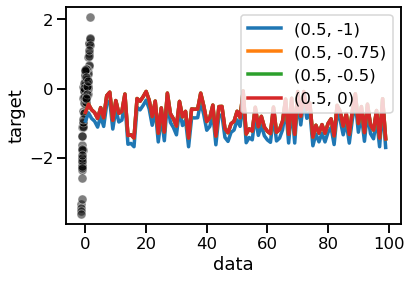

In [53]:
ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)
ax.plot(preds[0], label=f"{weight[0],intercept[0]}")
ax.plot(preds[1], label=f"{weight[0],intercept[1]}")
ax.plot(preds[1], label=f"{weight[0],intercept[2]}")
ax.plot(preds[1], label=f"{weight[0],intercept[3]}")
ax.legend()

In [54]:
# Write your code here.: compute the mean squared error

[np.sqrt(np.mean((preds[i] - target)**2)) for i in range(16)]

[1.077739068982597,
 0.9471507826525047,
 0.8704411004467963,
 0.9240205181069219,
 0.992167258447463,
 0.8428800726273658,
 0.7493315453986118,
 0.7991243089305874,
 0.9431071346720054,
 0.7784470819495567,
 0.6689608742836308,
 0.7110318102415666,
 1.1538978163206823,
 1.0049479278816909,
 0.9018650148430022,
 0.8917627708566316]

Train a linear regression model and plot both the data and the predictions
of the model. Compute the mean squared error with this model.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, by convention <tt class="docutils literal">data</tt> (also called <tt class="docutils literal">X</tt> in the scikit-learn
documentation) should be a 2D matrix of shape <tt class="docutils literal">(n_samples, n_features)</tt>.
If <tt class="docutils literal">data</tt> is a 1D vector, you need to reshape it into a matrix with a
single column if the vector represents a feature or a single row if the
vector represents a sample.</p>
</div>

In [37]:
from sklearn.linear_model import LinearRegression

# Write your code here.: fit a linear regression
model = LinearRegression()

In [40]:
data.shape

(100,)

In [41]:
model.fit(data.reshape(-1,1),target)

LinearRegression()

In [49]:
full_data.data.shape

(100,)

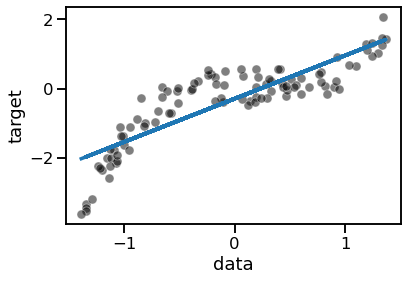

In [55]:
# Write your code here.: plot the data and the prediction of the linear
# regression model
preds=model.predict(data.reshape(-1,1))

ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)
ax.plot(data,preds)

In [57]:
# Write your code here.: compute the mean squared error
np.sqrt(np.mean((preds - target)**2))

0.6092416926188524